In [1]:
# 导入模块
import os
import numpy as np
import tensorflow.keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
tf.compat.v1.disable_eager_execution()

In [2]:
data1 = pd.read_excel('C:/Users/admin/Desktop/睡眠结构_T.xlsx','Sheet1',index_col=0)
data1.to_csv('C:/Users/admin/Desktop/睡眠结构_T.csv',encoding='utf-8')
pima = pd.read_csv('C:/Users/admin/Desktop/睡眠结构_T.csv') 
clo_names = pima.columns.tolist()
print(clo_names)
to_show = clo_names[:6] + clo_names[-6:]
pima[:].head(3)

['编号', '性别', '年龄', '身高', '体重', '吸烟史', '饮酒史', '高血压病史', '糖尿病史', '高脂血症病史', '是否有新发脑梗死病灶', 'SDS', 'SAS', 'CTI', '睡眠总长', '睡眠总长（分钟）', '睡眠效率', '清醒次数', '离床次数', 'R期时长百分比', '浅睡时长百分比', '深睡时长百分比', 'Y（0为正常，1为紊乱）']


,编号,性别,年龄,身高,体重,吸烟史,饮酒史,高血压病史,糖尿病史,高脂血症病史,...,CTI,睡眠总长,睡眠总长（分钟）,睡眠效率,清醒次数,离床次数,R期时长百分比,浅睡时长百分比,深睡时长百分比,Y（0为正常，1为紊乱）
0,202101,1,47,1.65,80,1,1,1,0,1,...,34,5小时27分钟,327,0.39,18,6,0.150,0.813,0.037,1
1,202101,1,47,1.65,80,1,1,1,0,1,...,34,8小时58分钟,538,0.53,30,7,0.266,0.613,0.121,1
2,202101,1,47,1.65,80,1,1,1,0,1,...,34,8小时10分钟,490,0.59,32,4,0.259,0.559,0.182,0


In [3]:
to_drop = ['编号','睡眠总长','R期时长百分比','浅睡时长百分比','深睡时长百分比']
pima_01 = pima.drop(to_drop,axis=1)

In [4]:
pima_01.head
clo_names_01 = pima_01.columns.tolist
print(clo_names_01)
pima_01.shape

# pima_01['受试者编号']

<bound method IndexOpsMixin.tolist of Index(['性别', '年龄', '身高', '体重', '吸烟史', '饮酒史', '高血压病史', '糖尿病史', '高脂血症病史',
       '是否有新发脑梗死病灶', 'SDS', 'SAS', 'CTI', '睡眠总长（分钟）', '睡眠效率', '清醒次数', '离床次数',
       'Y（0为正常，1为紊乱）'],
      dtype='object')>


(135, 18)

In [5]:
pima_01.describe()

,性别,年龄,身高,体重,吸烟史,饮酒史,高血压病史,糖尿病史,高脂血症病史,是否有新发脑梗死病灶,SDS,SAS,CTI,睡眠总长（分钟）,睡眠效率,清醒次数,离床次数,Y（0为正常，1为紊乱）
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,1.340741,63.718519,1.655037,69.874074,0.562963,0.311111,0.629630,0.244444,0.355556,0.362963,41.162963,40.311111,20.562963,403.822222,0.603037,18.066667,4.888889,0.711111
std,0.475724,11.558193,0.079362,11.696683,0.497867,0.464672,0.484702,0.431358,0.480464,0.482645,8.018828,7.246684,7.223105,162.804107,0.161070,9.289056,4.550983,0.454934
min,1.000000,30.000000,1.500000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,28.000000,11.000000,24.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,60.000000,1.600000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,36.000000,14.000000,298.500000,0.550000,12.000000,2.000000,0.000000
50%,1.000000,66.000000,1.650000,70.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,41.000000,40.000000,20.000000,427.000000,0.640000,18.000000,4.000000,1.000000
75%,2.000000,70.500000,1.700000,78.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,48.000000,46.000000,27.000000,532.500000,0.705000,24.500000,7.000000,1.000000
max,2.000000,81.000000,1.800000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,61.000000,37.000000,665.000000,0.850000,47.000000,24.000000,1.000000


In [6]:
to_drop_02 = ['离床次数','是否有新发脑梗死病灶','高脂血症病史','高血压病史','性别','糖尿病史','饮酒史']
pima_02 = pima_01.drop(to_drop_02,axis=1)

In [7]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 #卡方统计量
X = pima_02.iloc[:, 0:10] # 特征列 0-10列，不含第10列
Y = pima_02.iloc[:, 10] # 目标列为第10列


In [8]:
from sklearn.preprocessing import StandardScaler
 
rescaledX = StandardScaler().fit_transform(X)
#通过sklearn的preprocessing数据预处理中StandardScaler特征缩放 标准化特征信息
 
X = pd.DataFrame(data = rescaledX, columns = X.columns)
# 构建新特征DataFrame

X.head()

,年龄,身高,体重,吸烟史,SDS,SAS,CTI,睡眠总长（分钟）,睡眠效率,清醒次数
0,-1.451852,-0.063706,0.868933,0.881088,-0.145569,0.095417,1.867214,-0.473627,-1.327559,-0.007204
1,-1.451852,-0.063706,0.868933,0.881088,-0.145569,0.095417,1.867214,0.827237,-0.455137,1.289450
2,-1.451852,-0.063706,0.868933,0.881088,-0.145569,0.095417,1.867214,0.531306,-0.081241,1.505559
3,0.892854,1.327511,0.439870,0.881088,-0.020398,1.619006,0.894492,0.555967,1.102760,-0.439422
4,0.892854,1.327511,0.439870,0.881088,-0.020398,1.619006,0.894492,0.352514,0.666549,0.641123


In [9]:
# 将Y转成神经网络需要的数组结构
Y_01 = pd.get_dummies(Y).values

In [10]:
from sklearn.model_selection import train_test_split

seed = 5 #重现随机生成的训练
test_size = 0.25 #33%测试，67%训练
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_01, test_size=test_size, random_state=seed)

In [113]:
# 在再次训练之前重置训练
from keras import backend as back
curr_session = tf.compat.v1.get_default_session()
# close current session
if curr_session is not None:
    curr_session.close()
# reset graph
back.clear_session()
# create new session
s = tf.compat.v1.InteractiveSession()
tf.compat.v1.keras.backend.set_session(s)

In [114]:
# 定义模型
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0.0)
model = K.models.Sequential()
model.add(K.layers.Dense(units=15, input_dim=10, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=15, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=15, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=simple_adam, metrics=['accuracy'])

In [115]:
# 训练模型
b_size = 1
max_epochs = 15
print("Starting training ")
h = model.fit(X_train, Y_train, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1, validation_data=(X_test, Y_test))
print("Training finished \n")

Starting training 
Train on 101 samples, validate on 34 samples
Epoch 1/15
101/101 [==============================] - 0s 3ms/sample - loss: 0.6475 - accuracy: 0.7030 - val_loss: 0.5961 - val_accuracy: 0.7059
Epoch 2/15
101/101 [==============================] - 0s 3ms/sample - loss: 0.5717 - accuracy: 0.7129 - val_loss: 0.5609 - val_accuracy: 0.7059
Epoch 3/15
101/101 [==============================] - 0s 3ms/sample - loss: 0.5310 - accuracy: 0.7129 - val_loss: 0.5355 - val_accuracy: 0.7059
Epoch 4/15
101/101 [==============================] - 0s 3ms/sample - loss: 0.5075 - accuracy: 0.7129 - val_loss: 0.5239 - val_accuracy: 0.7059
Epoch 5/15
101/101 [==============================] - 0s 3ms/sample - loss: 0.4859 - accuracy: 0.7030 - val_loss: 0.5088 - val_accuracy: 0.7059
Epoch 6/15
101/101 [==============================] - 0s 3ms/sample - loss: 0.4678 - accuracy: 0.7129 - val_loss: 0.4938 - val_accuracy: 0.7059
Epoch 7/15
101/101 [==============================] - 0s 4ms/sample - lo

In [124]:
# 保存模型/加载模型
from keras.models import load_model
model.save('dl_T.h5')  # creates a HDF5 file 'dl_T.h5'
# del model  # 删除现有模型
# # 加载已保存模型
# model = load_model('dl_T.h5')

In [116]:
# 评估模型
eval = model.evaluate(X_test, Y_test, verbose=0)
print("Evaluation on test data: loss = %0.6f accuracy = %0.2f%% \n" \
          % (eval[0], eval[1] * 100) )

Evaluation on test data: loss = 0.383756 accuracy = 91.18% 



In [117]:
# 使用模型进行预测
Y_pred = model.predict(X_test)
Y_pred

array([[1.30963614e-02, 9.86903667e-01],
       [1.95844442e-01, 8.04155529e-01],
       [6.87273918e-04, 9.99312758e-01],
       [9.60011687e-03, 9.90399897e-01],
       [6.91644857e-08, 9.99999881e-01],
       [1.93142772e-01, 8.06857228e-01],
       [8.23491991e-01, 1.76508084e-01],
       [1.75954085e-06, 9.99998212e-01],
       [4.63870419e-05, 9.99953628e-01],
       [2.39798985e-03, 9.97602046e-01],
       [1.70929477e-01, 8.29070449e-01],
       [7.23800421e-01, 2.76199609e-01],
       [3.12031955e-01, 6.87968075e-01],
       [7.81163812e-01, 2.18836188e-01],
       [3.12570512e-01, 6.87429428e-01],
       [1.15454376e-01, 8.84545624e-01],
       [6.86935522e-08, 9.99999881e-01],
       [1.49190918e-01, 8.50809038e-01],
       [2.01023772e-01, 7.98976243e-01],
       [4.07622894e-03, 9.95923758e-01],
       [1.11756005e-17, 1.00000000e+00],
       [6.70629702e-20, 1.00000000e+00],
       [8.00870478e-01, 1.99129522e-01],
       [9.43188891e-02, 9.05681133e-01],
       [9.184188

In [118]:
Y_pred_class = np.argmax(Y_pred, axis=1)  #其实就是记录每个数组中值最大的数的index
Y_pred_class

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [119]:
Y_test_class = np.argmax(Y_test, axis=1)  #其实就是记录每个数组中值最大的数的index
Y_test_class

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [120]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_class, Y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.89      1.00      0.94        24

    accuracy                           0.91        34
   macro avg       0.94      0.85      0.88        34
weighted avg       0.92      0.91      0.91        34



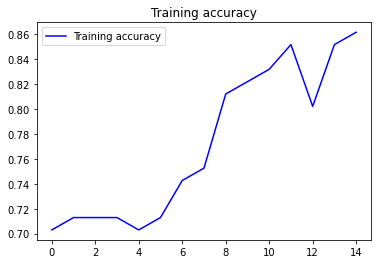

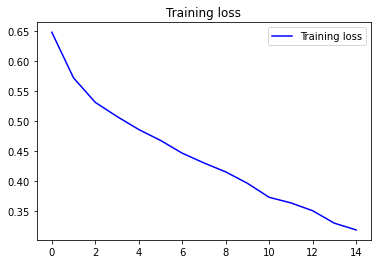

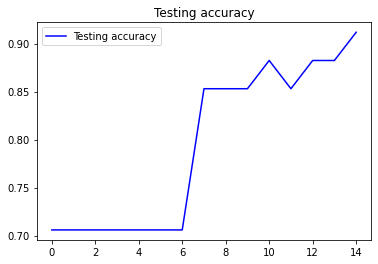

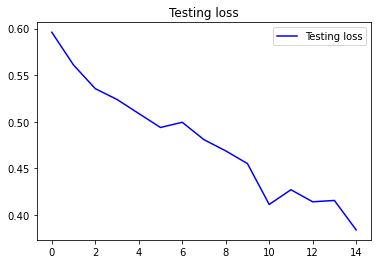

In [121]:
# 绘制loss、accuracy曲线
from matplotlib import pyplot as plt 

epochs=range(len(h.history['accuracy']))
plt.figure()
plt.plot(epochs,h.history['accuracy'],'b',label='Training accuracy')
plt.title('Training accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,h.history['loss'],'b',label='Training loss')
plt.title('Training loss')
plt.legend()

plt.figure()
plt.plot(epochs,h.history['val_accuracy'],'b',label='Testing accuracy')
plt.title('Testing accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,h.history['val_loss'],'b',label='Testing loss')
plt.title('Testing loss')
plt.legend()